# Building an Regression MPL Using the Sequential API

### Claifornia Housing problem from sklearn (it containes only numeric features without missing values)

In [22]:
import os
import sys

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#for importing images
from IPython.display import Image

np.random.seed(42)
tf.random.set_seed(42)
%matplotlib inline

In [23]:
# getting the data
housing = fetch_california_housing()

In [24]:
np.random.seed(42)

# split into train/test set
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

# split the train set into train/validation set
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

# scale the data
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_valid = scalar.transform(x_valid)
x_test = scalar.transform(x_test)

# check the shapes
x_train.shape, x_valid.shape, x_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [57]:
# Since the dataset is quite noisy,
# we just use a single hidden layer with fewer neurons than before,
# to avoid overfitting.
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model_1 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

model_1.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae'])

history = model_1.fit(x_train, y_train, epochs=20, batch_size=32,
                    validation_data=(x_valid, y_valid))

C:\Users\mkcle\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.6440 - mae: 0.9067 - val_loss: 0.8302 - val_mae: 0.6525
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7308 - mae: 0.6203 - val_loss: 0.6836 - val_mae: 0.5956
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6501 - mae: 0.5833 - val_loss: 0.6443 - val_mae: 0.5766
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6147 - mae: 0.5650 - val_loss: 0.6199 - val_mae: 0.5648
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5895 - mae: 0.5531 - val_loss: 0.5975 - val_mae: 0.5533
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5689 - mae: 0.5422 - val_loss: 0.5783 - val_mae: 0.5442
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5521 - mae: 0.5329 - val_loss: 0.5630 - val_mae: 0.5364
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [58]:
#evaluate model
mse_test = model_1.evaluate(x_test, y_test)

162/162 [==============================] - 0s 782us/step - loss: 0.4757 - mae: 0.4918


In [60]:
#predict
x_new = x_test[10:14]
y_pred = model_1.predict(x_new)
y_pred

array([[0.749923 ],
       [1.879406 ],
       [1.7586114],
       [2.212727 ]], dtype=float32)

In [61]:
y_test[10:14]

array([1.232, 2.539, 2.151, 2.205])

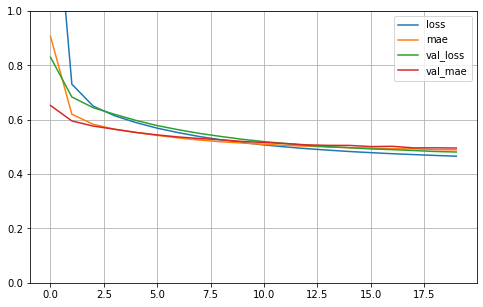

In [62]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Building Complex Models Using the Functional API

## <font color="orange">Wide & Deep</font>  neral network

<div class="alert alert-block alert-success">

**<font color="black">It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).</font>**

**<font color="black">A regular MPL forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformation.</font>** 
</div>

In [30]:
Image(url= "wide-and-deep-neural-network.png", width=400, height=400)

In [63]:
input_ = keras.layers.Input(shape=x_train.shape[1:]) # shape: (8,)
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model_1 = keras.Model(inputs=[input_], outputs=[output])

<div class="alert alert block alert-info">
<b>Code Above:</b>
    
<font color="black"><b>input_ :</b>  Specification of the kind of input the model will get, including its **<span style="font-family:Lucida Sans Unicode">shape</span>** and **<span style="font-family:Lucida Sans Unicode">dtype</span>** (a model can have multiple inputs)</font> 
    
<font color="black"><b>hidden1 :</b> a dense layer with 30 neurons, using the **<span style="font-family:Lucida Sans Unicode">ReLU</span>** activation function, passing the input (**Keras is connecting the layers together; no actual data is being processed yet**). <font color="Brown">This is why this is called a Functional API</font> 
    
<font color="black"><b>hidden2 :</b> secound dense layer with 30 neurons, again used as a function.The output from **hidden1** is being passed in as the argument.  
    
<font color="black"><b>concat :</b> <span style="font-family:Lucida Sans Unicode">Concatenate</span> layer; used to concatinate the **input_** (first layer) and output from **hidden2**
    
<font color="black"><b>output :</b> with 1 neuron and no activation function, and called like a function passing in the result from **concat**
    
<font color="black"><b>model_1 :</b> creating Keras model, specifying which inputs and outputs to use.    
</div>



In [64]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_3[0][0]                

In [65]:
#compile the model
model_1.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae'])

history_1 = model_1.fit(x_train, y_train, epochs=20, batch_size=32,
                    validation_data=(x_valid, y_valid))

C:\Users\mkcle\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8818 - mae: 1.0131 - val_loss: 0.7490 - val_mae: 0.6103
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6765 - mae: 0.5825 - val_loss: 0.6373 - val_mae: 0.5699
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6169 - mae: 0.5628 - val_loss: 0.6004 - val_mae: 0.5540
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5771 - mae: 0.5455 - val_loss: 0.5769 - val_mae: 0.5436
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5570 - mae: 0.5374 - val_loss: 0.5571 - val_mae: 0.5338
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5375 - mae: 0.5277 - val_loss: 0.5427 - val_mae: 0.5282
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5237 - mae: 0.5201 - val_loss: 0.5308 - val_mae: 0.5210
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [66]:
#evaluate model
model_1.evaluate(x_test, y_test, verbose=2)

162/162 - 0s - loss: 0.4680 - mae: 0.4884


[0.46802419424057007, 0.4883664548397064]

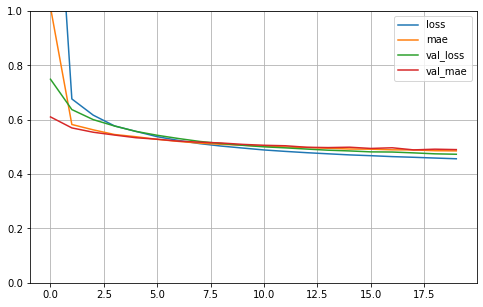

In [67]:
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<div class="alert alert-block alert-success">
    
**<font color="Black">If I want to send a subset of the features through the wide path and a different subset (possible overlapping) through the deep path, `one sollution is to use multiple inputs`**
    
<font color="Black">Example: suppose I want to send 5 features through the wide path, and 6 features through the deep path (code below)   
     
</div>

In [68]:
Image(url= "handling-multiple-inputs.png", width=400, height=400)

In [69]:
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.backend.clear_session()

# send 5 features through the wide path (features 0 - 4)
# and all features through the deep path
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2]) # make sure concatenate is spelled with a lower case for functional API
output = keras.layers.Dense(1, name="output")(concat)
model_2 = keras.Model(inputs=[input_A, input_B], outputs=[output])

model_2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

<div class="alert alert block alert-info">
<font color="black"><b>Compiling model_2:</b>
    
<font color="black">When calling method **fit()** a pair of matrices must be passed **`(x_train_A, x_train_B)`**: one per input, same for **`x_valid`** and **`x_test`** when calling **evaluate()** or **predict()**    
    
</div>

In [70]:
# split data into 2 groups 'A' and 'B'
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]

# a couple of samples to make predictions in the end
x_new_A, x_new_B = x_train_A[:3], x_train_B[:3]

In [71]:
#compiling model_2
model_2.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

#fit model_2
history_2 = model_2.fit((x_train_A, x_train_B), y_train, epochs=20,
                      validation_data=((x_valid_A, x_valid_B), y_valid))

C:\Users\mkcle\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8248 - val_loss: 0.7923
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7055 - val_loss: 0.6450
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6258 - val_loss: 0.6057
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5910 - val_loss: 0.5840
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5690 - val_loss: 0.5665
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5508 - val_loss: 0.5542
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5373 - val_loss: 0.5430
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5256 - val_loss: 0.5343
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5168 - val_loss: 0.5270
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5093 - val_loss: 0.5214

In [72]:
mse_test = model_2.evaluate((x_test_A, x_test_B), y_test)

162/162 [==============================] - 0s 836us/step - loss: 0.4846


In [73]:
#predict
y_pred = model_2.predict((x_new_A, x_new_B))
y_pred

array([[1.8298836],
       [2.1852634],
       [2.489046 ]], dtype=float32)

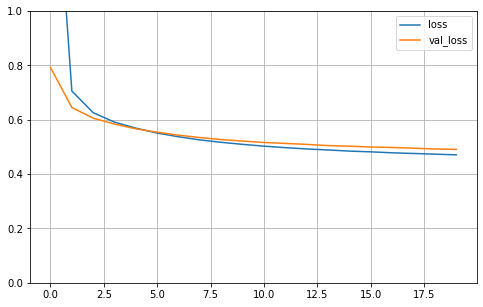

In [85]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<div class="alert alert-block alert-success">
    
**<font color="Black">Adding extra outputs, `connect them to the appropriate layears and add the to the model's list of outluts`**
     
</div>

In [75]:
Image(url= "handling-multiple-outputs-adding-an-auxiliary-output.png", width=600, height=600)

In [79]:
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.backend.clear_session()

# add an auxiliary output for regularization
input_A = keras.layers.Input(shape=[5], name='wide')
input_B = keras.layers.Input(shape=[6], name='deep')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
# auxiliary output
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)  
concat = keras.layers.concatenate([input_A, hidden2])
main_output = keras.layers.Dense(1, name='main_output')(concat)

model_3 = keras.Model(inputs=[input_A, input_B],
                    outputs=[main_output, aux_output])

model_3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep (InputLayer)               [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         deep[0][0]                       
__________________________________________________________________________________________________
wide (InputLayer)               [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

<div class="alert alert block alert-info">
<font color="black"><b>Compiling model_3:</b>
    
<font color="black">**In this case each needs its own** `loss function`. **When compiling the model a list of losses should be passed** (if one loss is passed: Keras will assume that the same loos must be used for all outputs).
    
**Give the main output's loss a much greater weight.**
    
</div>

In [80]:
model_3.compile(
    loss=["mse", "mse"],    # each output need its own loss function
    loss_weights=[0.9, 0.1],   # give the main output's loss a much greater weight
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["mae"])

history_3 = model_3.fit(
    [x_train_A, x_train_B], [y_train, y_train], epochs=20, batch_size=32,
    validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1692 - main_output_loss: 1.7461 - aux_output_loss: 5.9779 - main_output_mae: 0.9568 - aux_output_mae: 2.1304 - val_loss: 1.2573 - val_main_output_loss: 0.9012 - val_aux_output_loss: 4.4619 - val_main_output_mae: 0.6919 - val_aux_output_mae: 1.7696
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0882 - main_output_loss: 0.8238 - aux_output_loss: 3.4677 - main_output_mae: 0.6683 - aux_output_mae: 1.4696 - val_loss: 0.9279 - val_main_output_loss: 0.7228 - val_aux_output_loss: 2.7739 - val_main_output_mae: 0.6312 - val_aux_output_mae: 1.2302
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8601 - main_output_loss: 0.7025 - aux_output_loss: 2.2781 - main_output_mae: 0.6249 - aux_output_mae: 1.0943 - val_loss: 0.8029 - val_main_output_loss: 0.6642 - val_aux_output_loss: 2.0514 - val_main_output_mae: 0.6017 - val_aux_output_mae: 0.9978
Epoch 4/20
363/363 [========

In [82]:
# When evaluating the model,
# Keras will return the total loss, as well as all the individual losses
model_3.evaluate((x_test_A, x_test_B), (y_test, y_test), verbose=2)

162/162 - 0s - loss: 0.5505 - main_output_loss: 0.5020 - aux_output_loss: 0.9871 - main_output_mae: 0.5104 - aux_output_mae: 0.7638


[0.550479531288147,
 0.5019632577896118,
 0.987126886844635,
 0.5103853940963745,
 0.7637625336647034]

In [83]:
total_loss, main_loss, aux_loss, main_mae, aux_mae = model_3.evaluate((x_test_A, x_test_B), (y_test, y_test), verbose=2)

162/162 - 0s - loss: 0.5505 - main_output_loss: 0.5020 - aux_output_loss: 0.9871 - main_output_mae: 0.5104 - aux_output_mae: 0.7638


In [84]:
main_loss*0.9 + aux_loss*0.1

0.5504796206951141

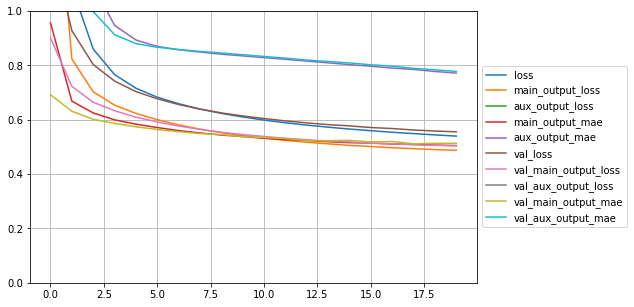

In [87]:
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [88]:
# save the model
# model.save('./models/chap10-models/my_keras_model.h5')

In [89]:
# load the saved model
# model = keras.models.load_model('./models/chap10-models/my_keras_model.h5')
# model.summary()

In [ ]:
# use the model to make predictions
# model_2.predict(x_test)